In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error

In [30]:
d = pd.read_csv(r"/content/challenge_data_20.csv")
print(d.shape)

(2003, 4)


In [31]:
print(d[d.operating_hours == 0])
d = d.drop([1828,1829])
print(d.shape)

            time  operating_hours  fuel_consumption(liter)   engine_id
1828  2018-01-14                0                   4776.0  5452799300
1829  2018-01-15                0                   4776.0  5452799300
(2001, 4)


In [32]:
ind = d.engine_id.unique()
print(ind)
unique = []
for i in ind:
    unique.append(d[d.engine_id == i])
print(unique[0])

[8331744407 7133245688 3643747759 3308150982 8711753003 2582458400
 8481959000 7940559597 2159359786 5687959787 4569859790 3413759796
 5246759857 2654264148 3850565523 5452766296 5452799100 5452799200
 5452799300 5452799400]
           time  operating_hours  fuel_consumption(liter)   engine_id
0    2017-12-19             3726                   3404.8  8331744407
1    2017-12-20             3746                   3865.6  8331744407
2    2017-12-21             3748                   3891.2  8331744407
3    2017-12-22             3768                   3840.0  8331744407
4    2017-12-23             3776                   3891.2  8331744407
..          ...              ...                      ...         ...
96   2018-03-25             5176                   3840.0  8331744407
97   2018-03-26             5283                   3532.8  8331744407
98   2018-03-27             5303                   3865.6  8331744407
99   2018-03-28             5322                   3814.4  8331744407
100  

20


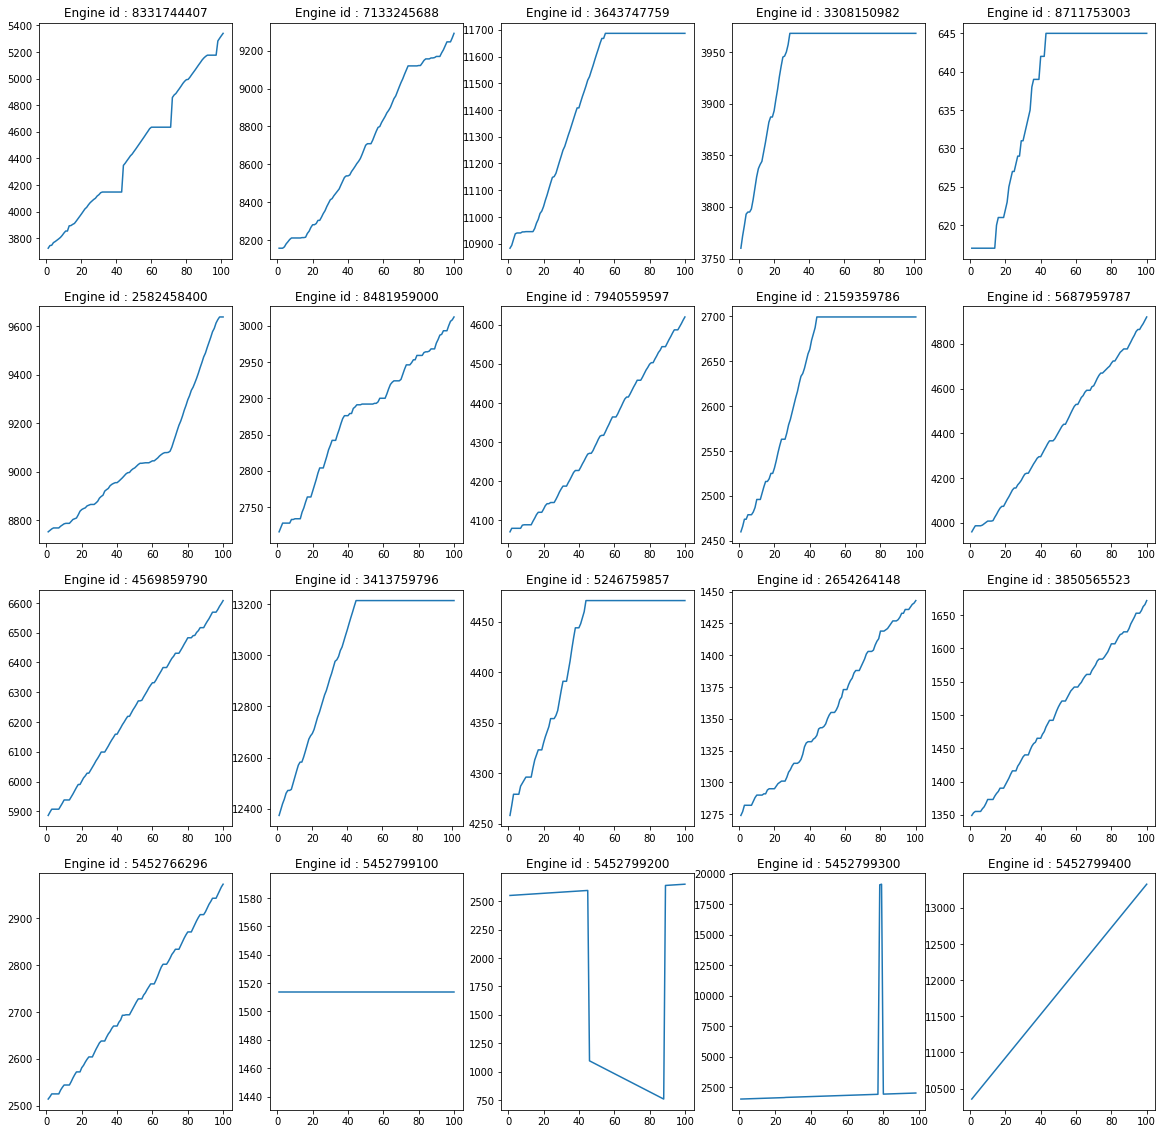

In [33]:
print(len(unique))
w = 0
f, a = plt.subplots(4, 5, figsize = (20, 20))
for j in range(4):
    for k in range(5):
        a[j,k].plot([i for i in range(1, len(unique[w].operating_hours)+1)], unique[w].operating_hours)
        a[j,k].set_title("Engine id : "+str(ind[w]))
        w = w+1
plt.show()

In [75]:
l = {}
for w in range(len(ind)):
    l[ind[w]] = unique[w].operating_hours
model = []
forecast = []
forecast_1 = []
train = []
valid = []
rmse = []
i = 0
for w in l:
    train.append(l[w][:int(0.9*(len(l[w])))])
    valid.append(l[w][int(0.9*(len(l[w]))):])
    model.append(auto_arima(train[i], trace=True, error_action='ignore', suppress_warnings=True))
    model[i].fit(train[i])
    temp = model[i].predict(n_periods = len(valid[i])+15)
    forecast.append(temp[:len(valid[i])])
    forecast_1.append(temp[len(valid[i]):])
    n = len(valid[i])
    t = [n+j for j in range(0,15)]
    forecast[i] = pd.DataFrame(forecast[i],index = valid[i].index, columns=['Prediction'])
    forecast_1[i] = pd.DataFrame(forecast_1[i],index = t, columns=['Prediction'])
    rmse.append(sqrt(mean_squared_error(valid[i],forecast[i])))
    i = i+1

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=874.847, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=866.877, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=868.872, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=868.872, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=886.228, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=870.873, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.425 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=604.235, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=639.782, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=598.937, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=609.738, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=727.741, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=600.903, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=600.904, Time=0

/usr/local/lib/python3.6/dist-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1575.461, Time=0.01 sec
Total fit time: 0.008 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1250.705, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1242.705, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1244.705, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1244.705, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1240.707, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1246.705, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.231 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1637.221, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1614.220, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1680.577, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] i

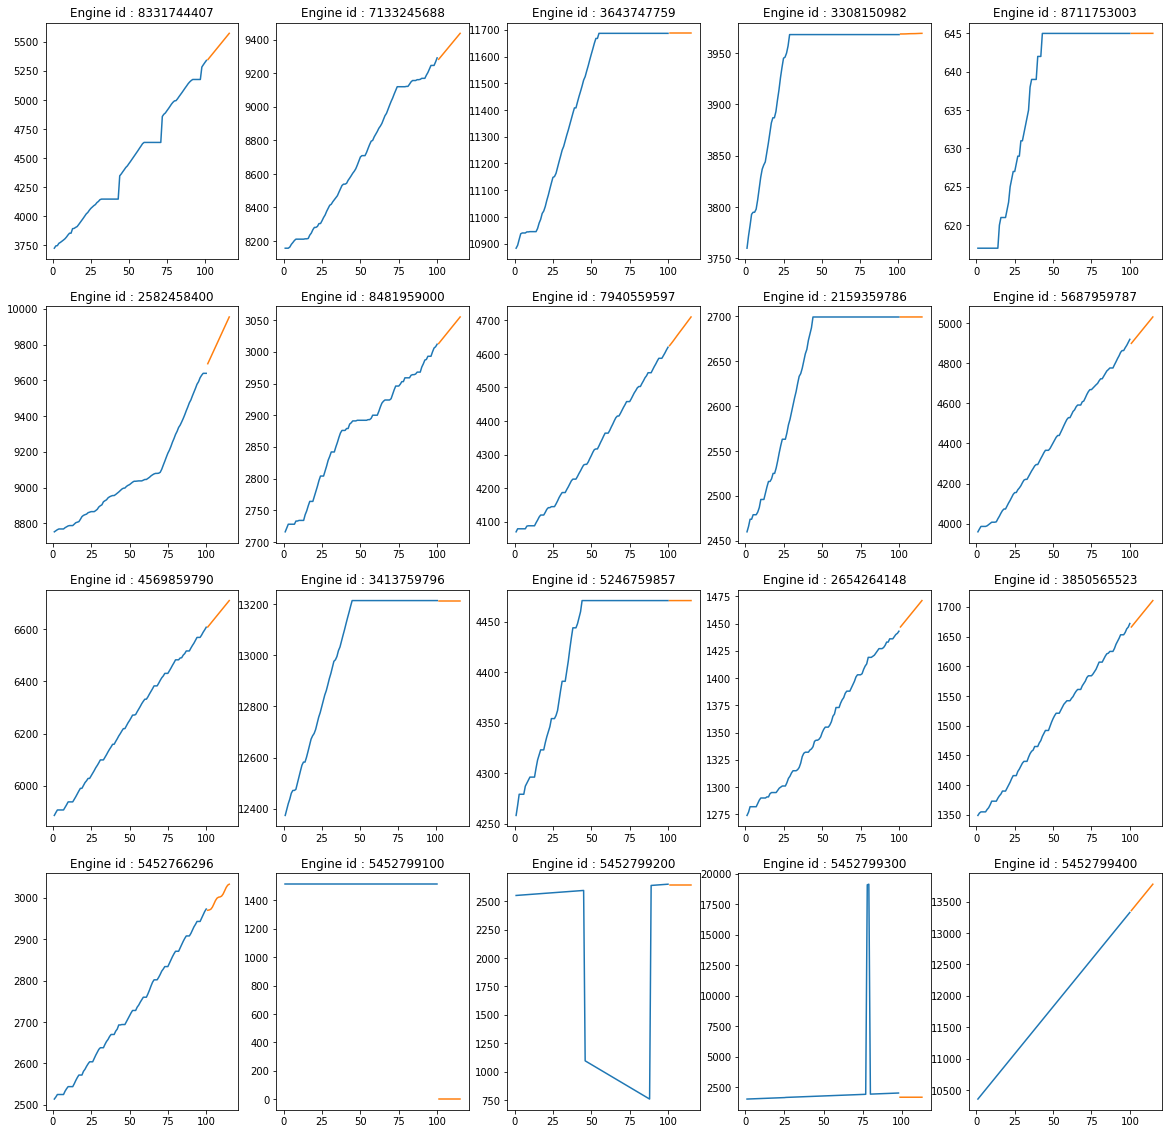

In [64]:
w = 0
f, a = plt.subplots(4, 5, figsize = (20, 20))
for j in range(4):
    for k in range(5):
        a[j,k].plot([i for i in range(1, len(unique[w].operating_hours)+1)], unique[w].operating_hours, label = 'Train')
        a[j,k].plot([i for i in range(len(unique[w].operating_hours)+1, len(unique[w].operating_hours)+16)], forecast_1[w], label = 'Prediction')
        a[j,k].set_title("Engine id : "+str(ind[w]))
        w = w+1
plt.show()

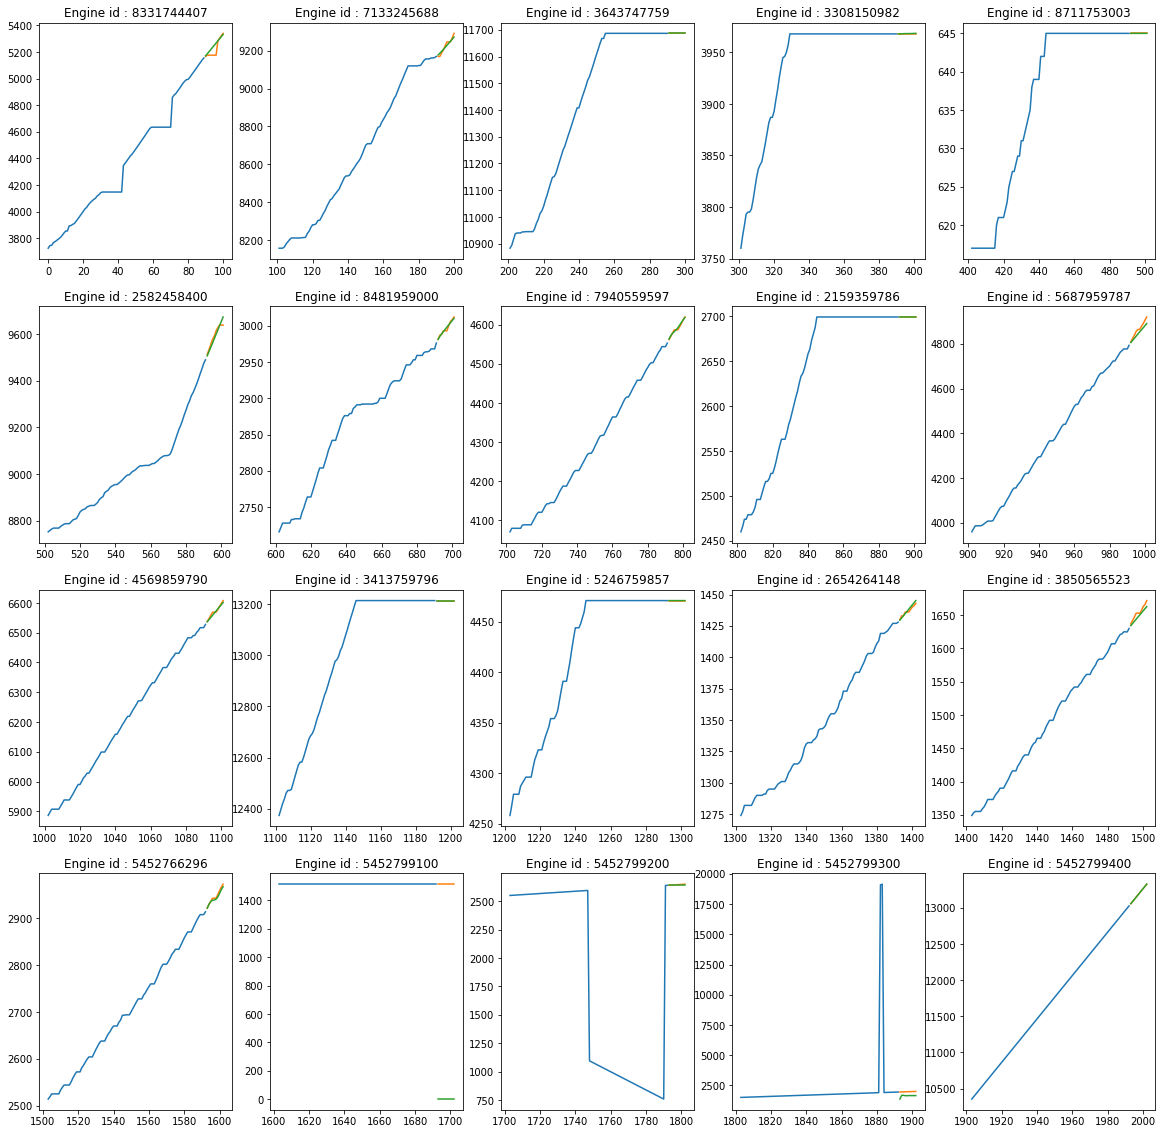

In [38]:
w = 0
f, a = plt.subplots(4, 5, figsize = (20, 20))
for j in range(4):
    for k in range(5):
        a[j,k].plot(train[w], label = 'Train')
        a[j,k].plot(valid[w], label = 'Valid')
        a[j,k].plot(forecast[w], label = 'Prediction')
        a[j,k].set_title("Engine id : "+str(ind[w]))
        w = w+1
plt.show()

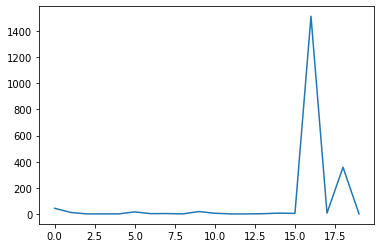

In [39]:
plt.plot(rmse)
plt.show()

In [143]:
d = forecast_1
k = []
for w in range(len(d)):
  k.append(d[w]["Prediction"])
k = pd.DataFrame(k)
v = k.values
v = v.T
i = np.arange(v.shape[1])
a = np.isnan(v).argsort(0, kind='mergesort')
v[:] = v[a, i]
k = k.transpose()
k = k.dropna()
temp = ["Engine ID = "+str(w) for w in ind]
k.to_csv(r"/content/1.csv", header=temp, index=False)

[43.07835622570454, 11.50155435984326, 2.2702055367155898e-09, 0.3129875726692451, 0.002344295649580631, 15.615315036627134, 2.094953674747557, 2.8273404977152747, 0.011718782709811481, 18.13030150187813, 5.086146313130162, 0.00027044864876373605, 0.0030612992858412044, 1.6459863384897782, 6.063617897014028, 3.9111930820224594, 1514.0, 6.2048368229954285, 357.33694909375555, 2.832656664166055e-05]
